# Partial differential equations

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams

Set up ...

In [2]:
%matplotlib notebook

rcParams['mathtext.fontset'] = 'cm'
rcParams['font.size'] = 14

red = "#e41a1c"
blue = "#377eb8"
gray = "#eeeeee"

## Heat equation

$$\alpha \frac{\partial^2 u}{\partial x^2} = \frac{\partial u}{\partial t}$$

In [3]:
def heat_update(n):
    ax0.cla()    
    for cont in range(ntime):
        u_heat[1:N-1] = dt/(factor*dx**2)*(u_heat[2:N] + u_heat[0:N-2] -
                                           2*u_heat[1:N-1]) + u_heat[1:N-1]

    ax0.plot(x, u_heat)
    ax0.set_ylim(-1.2, 1.2)
    ax0.set_title("$t = {:.2f}$".format(n*ntime*dt))

In [4]:
N = 2001
x = np.linspace(-1, 1, N)
dx = x[1] - x[0]
diff = 1
factor = 10
dt = dx**2/(factor*diff)
ntime = 10

<IPython.core.display.Javascript object>


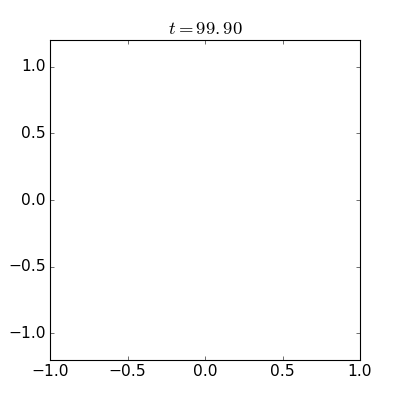

In [5]:
u_heat = 1 - abs(4*x)
u_heat[x < -0.25] = 0
u_heat[x > 0.25] = 0

fig0 = plt.figure(figsize=(5, 5))
ax0 = fig0.add_subplot(111)
ani0 = animation.FuncAnimation(fig0, heat_update, range(1000), blit=False, repeat=False)

## Wave equation

$$c^2 \frac{\partial^2 u}{\partial x^2} = \frac{\partial^2 u}{\partial t^2}$$

In [6]:
def wave_update(n):
    ax1.cla()    
    for cont in range(ntime):
        u_aux = u.copy()
        u_aux2 = u_old.copy()
        u_old[:] = u[:]
        u[1:N-1] = alpha**2*(u_aux[2:N] + u_aux[0:N-2] - 2*u_aux[1:N-1]) \
                    + 2*u_aux[1:N-1] - u_aux2[1:N-1]

    ax1.plot(x, u)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_title("$t = {:.2f}$".format(n*ntime*dt))

In [7]:
N = 2001
x = np.linspace(-1, 1, N)
dx = x[1] - x[0]
vel = 1
factor = 10
dt = dx/(factor*vel)
alpha = vel*dt/dx
ntime = 1000

<IPython.core.display.Javascript object>


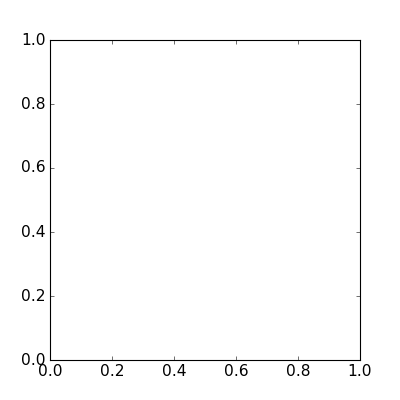

In [8]:
u_old = 1 - abs(4*x)
u_old[x < -0.25] = 0
u_old[x > 0.25] = 0
u_w = u_old.copy()

fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_subplot(111)
ani1 = animation.FuncAnimation(fig1, wave_update, range(100), blit=False, repeat=False)

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()